<a href="https://colab.research.google.com/github/ramachandra742/NLP-Projects/blob/End-to-End-Sentiment-analysis-predictor-using-Pytorch/Dataset/Dataset_for_Sentiment_Analysis_by_Scraping_user_reviews_for_top_30_free_Google_play_apps_in_India_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*A* dataset has been created for **Sentiement Analysis** by scraping user reviews for Android apps using Python. This dataset contains user reviews for **top 30 free Google play apps in India** as of today. Google play scraper is used for this task.

#### Import required packages

In [31]:
import json
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter,TerminalTrueColorFormatter

!pip install google-play-scraper
from google_play_scraper import Sort,reviews,app,reviews_all

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid',palette='muted',font_scale=1.2)

Let\'s choose top 30 Google play apps in  India from [Google Play store](https://play.google.com/store/apps/collection/cluster?clp=0g4jCiEKG3RvcHNlbGxpbmdfZnJlZV9BUFBMSUNBVElPThAHGAM%3D:S:ANO1ljKs-KA&gsr=CibSDiMKIQobdG9wc2VsbGluZ19mcmVlX0FQUExJQ0FUSU9OEAcYAw%3D%3D:S:ANO1ljL40zU&hl=en_IN).

In [14]:
app_packages=[
              'com.kwai.bulldog',                             # Snack Video app
              'com.next.innovation.takatak',                  # MX Takatak - Short video app by Mx player
              'com.eterno.shortvideos',                       # Josh - Short video app
              'com.google.android.apps.meetings',             # Google Meet app
              'in.mohalla.video',                             # Moj - Short video app by ShareChat
              'in.mohalla.sharechat',                         # ShareChat app
              'us.zoom.videomeetings',                        # Zoom Cloud meetings
              'in.amazon.mShop.android.shopping',             # Amazon online shopping app
              'com.funnypuri.client',                         # Zili - Funny short video app
              'com.instagram.android',                        # Instagram
              'com.swifthawk.picku.free',                     # PickU - Cutout Photo Editor & Background Erase app
              'com.flipkart.android',                         # Flipkart online shopping app
              'com.newbiz.mvmaster',                          # MV Master - Make Your Status Video & Community app
              'com.snapchat.android',                         # Snapchat app
              'com.whatsapp',                                 # WhatsApp Messenger app
              'com.cardfeed.video_public',                    # Public - Indian Local Videos app
              'com.phonepe.app',                              # PhonePe – UPI Payments, Recharges & Money Transfer app
              'com.truecaller',                               # Truecaller: Caller ID, SMS, spam block & payments app
              'com.google.android.apps.nbu.paisa.user',       # Google Pay - a simple and secure payment app
              'com.facebook.katana',                          # Facebook app
              'com.roposo.android',                           # Roposo - India's own video app
              'com.gaana',                                    # Gaana Song Hotshots Video Music Free Hindi MP3 App
              'com.mxtech.videoplayer.ad',                    # MX Player app
              'sharefiles.sharemusic.shareapps.filetransfer', # 	InShare - Share Apps & File Transfer app
              'com.facebook.lite',                            # Facebook Lite app
              'org.telegram.messenger',                       # Telegram app
              'com.whatsapp.w4b',                             # WhatsApp Business app
              'com.jio.myjio',                                # MyJio: For Everything Jio app
              'com.jio.media.jiobeats',                       # JioSaavn Music & Radio – JioTunes, Podcasts, Songs app
              'com.bsbportal.music'                           # Wynk Music- New MP3 Hindi Songs Download HelloTune app
]

Let\'s scrap information for each app:

In [15]:
app_results=[]
for i in tqdm(range(0,30)):
  results=app(app_packages[i], lang='en',country='IN')
  del results['comments']
  app_results.append(results)

100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


We got the app results for all 30 apps. Let\'s build a function to print json object:

In [16]:
def print_json(json_obj):
  json_str=json.dumps(json_obj,indent=2,
                      sort_keys=True,default=str)
  print(highlight(json_str,JsonLexer(),TerminalTrueColorFormatter()))

Here is a sample results for app in the list:

In [17]:
print_json(app_results[0])        # For Snack Video app

{
  "adSupported": true,
  "androidVersion": "4.3",
  "androidVersionText": "4.3 and up",
  "appId": "com.kwai.bulldog",
  "containsAds": true,
  "contentRating": "Rated for 12+",
  "contentRatingDescription": "Parental Guidance Recommended",
  "currency": "USD",
  "description": "\ud83e\udd23\ud83e\udd23\ud83e\udd23<b>Snack Video</b> is the newest party for short funny videos! You can find the most exciting, funny, magic videos on Snack Video. All you have to do is watch, engage with what you like, skip what you don\u2019t, and you\u2019ll find an endless stream of short videos that feel personalized just for you.\r\n\r\n<b>Explore videos, just one scroll away</b>\r\nWatch all types of funny videos, including prank, comedy, entertainment, news, pets,games etc. Just scroll away and find what you like.\r\n\r\n<b>Watch endless amount of videos customized specifically for you</b>\r\nA personalized video feed based on what you watch, like, and share. Snack Video offers you real, interestin

It containes a lot of information including number of installs, number of ratings, number of reviews & rating for each app.  
Let\'s ignore all of these have a look at beautiful icons:

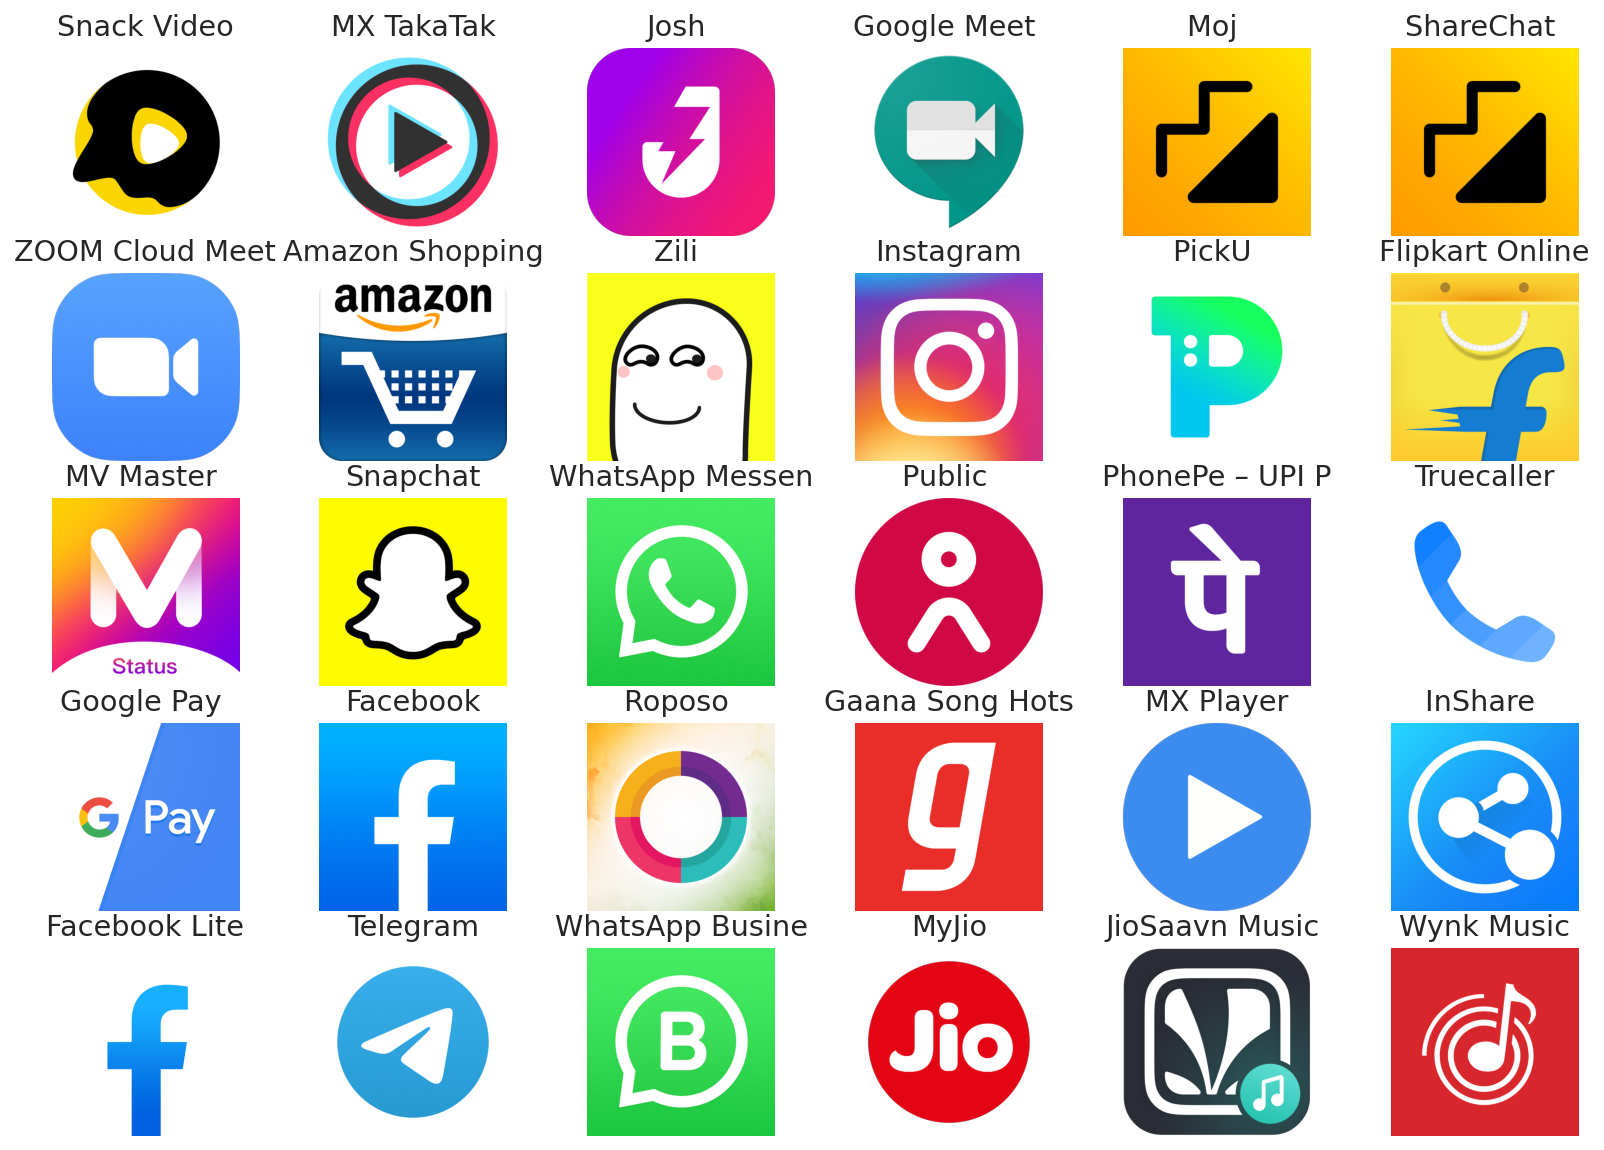

In [18]:
import matplotlib.image as image
def app_title(title):
  sep_index=title.find(':') if title.find(':')!= -1 else title.find('-')
  if sep_index!= -1:
    title=title[:sep_index]
  return title[:15]

fig,axs = plt.subplots(5,len(app_results)//5, figsize=(14,10))

for i,ax in enumerate(axs.flat):
  ari=app_results[i]
  try:
    img=image.imread(ari['icon'])
  except ValueError:
    pass
  ax.imshow(img)
  ax.set_title(app_title(ari['title']))
  ax.axis('off')

From above apps, it appears that Social media apps are among top being used by Indians than any other category app in Google play store.

## Scraping App reviews

The app_results contains a lot of information for each app. But we want:
* Balanced dataset - raughly same number of reviews for each score (1-5)
* A representative sample of reviews for each app.


Let\'s scarpe relevent info for each app:

In [36]:
app_reviews=[]

for app in tqdm(range(0,30)):
  for score in range(1,6):
      for sort_order in [Sort.MOST_RELEVANT,Sort.NEWEST]:
        rvr,_ = reviews(
          app_packages[app], lang='en',country='IN',sort=sort_order,
          count=200 if score==3 else 100
      )
      for i in rvr:
        if sort_order== Sort.MOST_RELEVANT:
          i['sortOrder']='most_relevant' 
        else :
          i['sortOrder']='newest'
        i['appId']=app
      app_reviews.extend(rvr)




  0%|          | 0/30 [00:00<?, ?it/s]


  3%|▎         | 1/30 [00:01<00:49,  1.72s/it]


  7%|▋         | 2/30 [00:04<00:57,  2.05s/it]


 10%|█         | 3/30 [00:06<00:55,  2.05s/it]


 13%|█▎        | 4/30 [00:08<00:54,  2.08s/it]


 17%|█▋        | 5/30 [00:10<00:51,  2.07s/it]


 20%|██        | 6/30 [00:13<00:54,  2.26s/it]


 23%|██▎       | 7/30 [00:15<00:51,  2.24s/it]


 27%|██▋       | 8/30 [00:18<00:51,  2.34s/it]


 30%|███       | 9/30 [00:20<00:49,  2.37s/it]


 33%|███▎      | 10/30 [00:23<00:49,  2.46s/it]


 37%|███▋      | 11/30 [00:25<00:45,  2.42s/it]


 40%|████      | 12/30 [00:27<00:42,  2.38s/it]


 43%|████▎     | 13/30 [00:30<00:38,  2.29s/it]


 47%|████▋     | 14/30 [00:32<00:36,  2.27s/it]


 50%|█████     | 15/30 [00:34<00:34,  2.27s/it]


 53%|█████▎    | 16/30 [00:36<00:31,  2.24s/it]


 57%|█████▋    | 17/30 [00:39<00:29,  2.25s/it]


 60%|██████    | 18/30 [00:40<00:26,  2.17s/it]


 63%|██████▎   | 19/30 [00:43<00:24,  2.27s/it]


 67%|██████▋   

How many number of reviews did we get?

In [39]:
print('Number of reviews being scraped is {}'.format(len(app_reviews)))

Number of reviews being scraped is 18000


Here a sample of app_review :

In [42]:
print_json(app_reviews[0])

{
  "appId": 0,
  "at": "2020-08-10 03:15:48",
  "content": "wow",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": null,
  "reviewId": "gp:AOqpTOE2Yr0uRwtSM19o3qq9rmIciKMII4oWvQ4X-TVmX1EQV8o8SDiZqAv9siU5FVr5MkBp8rmOjnnqJF-a-CA",
  "score": 5,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://lh3.googleusercontent.com/a-/AOh14GiBWYGp13O5yTwz1RynqVo3y1syU_feHNNok6wUtA",
  "userName": "Pankaj meena"
}



Let\'s save app reviews to a CSV file

In [46]:
df=pd.DataFrame(app_reviews)
df.to_csv('App_reviews.csv',index=False, header=True)

## References:
1.[Scraping user reviews from Google play store](https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/)             

2.[Google Play Store](https://play.google.com/store/apps/collection/cluster?clp=0g4jCiEKG3RvcHNlbGxpbmdfZnJlZV9BUFBMSUNBVElPThAHGAM%3D:S:ANO1ljKs-KA&gsr=CibSDiMKIQobdG9wc2VsbGluZ19mcmVlX0FQUExJQ0FUSU9OEAcYAw%3D%3D:S:ANO1ljL40zU&hl=en_IN)        

3.[Google Play Scraper](https://github.com/JoMingyu/google-play-scraper)
